In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2022-01-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2022_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-01-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6675,북구,8900,북구,2225,33.33%,"7,788"
1,2022-01-20,간장,오복왕표 0.9ℓ 1병,5720,북구,6980,북구,1260,22.03%,"6,350"
2,2022-01-20,갈치,60cm정도 500g 1마리(냉동),6500,북구,18500,북구,12000,184.62%,"12,500"
3,2022-01-20,달걀,오경슈퍼란60g정도 10개,3500,북구,3990,북구,490,14.0%,"3,745"
4,2022-01-20,닭고기,육계 1.0㎏,6650,북구,8980,북구,2330,35.04%,"7,815"
5,2022-01-20,대파,1.0㎏,1980,북구,3140,북구,1160,58.59%,"2,560"
6,2022-01-20,돼지고기,삼겹살 500g,11400,북구,12400,북구,1000,8.77%,"11,900"
7,2022-01-20,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
8,2022-01-20,라면,신라면 120g 1봉지,736,북구,740,북구,4,0.54%,738
9,2022-01-20,맥주,하이트 500㎖ 1병,1440,북구,1460,북구,20,1.39%,"1,450"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2022-04-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2022_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-04-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,북구,8900,북구,1475,19.87%,"8,163"
1,2022-04-21,간장,오복왕표 0.9ℓ 1병,5720,북구,6980,북구,1260,22.03%,"6,350"
2,2022-04-21,갈치,60cm정도 500g 1마리(냉동),7000,북구,15409,북구,8409,120.13%,"11,205"
3,2022-04-21,고등어,30㎝정도 500g 1마리,4500,북구,5000,북구,500,11.11%,"4,750"
4,2022-04-21,달걀,오경슈퍼란60g정도 10개,3800,북구,3990,북구,190,5.0%,"3,895"
5,2022-04-21,닭고기,육계 1.0㎏,6980,북구,8316,북구,1336,19.14%,"7,648"
6,2022-04-21,대파,1.0㎏,1980,북구,2490,북구,510,25.76%,"2,235"
7,2022-04-21,돼지고기,삼겹살 500g,8900,북구,12900,북구,4000,44.94%,"10,900"
8,2022-04-21,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,5194,북구,3694,246.27%,"3,347"
9,2022-04-21,라면,신라면 120g 1봉지,736,북구,740,북구,4,0.54%,738


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2022-07-21"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2022_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-07-21,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,북구,10900,북구,1975,22.13%,"9,913"
1,2022-07-21,간장,오복왕표 0.9ℓ 1병,5200,북구,6980,북구,1780,34.23%,"6,090"
2,2022-07-21,갈치,60cm정도 500g 1마리(냉동),6000,북구,12571,북구,6571,109.52%,"9,286"
3,2022-07-21,고등어,30㎝정도 500g 1마리,4975,북구,5000,북구,25,0.5%,"4,988"
4,2022-07-21,달걀,오경슈퍼란60g정도 10개,3990,북구,4100,북구,110,2.76%,"4,045"
5,2022-07-21,닭고기,육계 1.0㎏,5816,북구,8600,북구,2784,47.87%,"7,208"
6,2022-07-21,대파,1.0㎏,3480,북구,3740,북구,260,7.47%,"3,610"
7,2022-07-21,돼지고기,삼겹살 500g,13900,북구,13900,북구,0,0.0%,"13,900"
8,2022-07-21,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,4509,북구,3009,200.6%,"3,005"
9,2022-07-21,라면,신라면 120g 1봉지,736,북구,740,북구,4,0.54%,738


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2022-10-20"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2022_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2022-10-20,가루비누,"세탁용세제(LG테크),가루형,3.0kg",8925,북구,10900,북구,1975,22.13%,"9,913"
1,2022-10-20,간장,오복왕표 0.9ℓ 1병,5200,북구,6980,북구,1780,34.23%,"6,090"
2,2022-10-20,갈치,60cm정도 500g 1마리(냉동),6500,북구,16500,북구,10000,153.85%,"11,500"
3,2022-10-20,고등어,30㎝정도 500g 1마리,5000,북구,5725,북구,725,14.5%,"5,363"
4,2022-10-20,달걀,오경슈퍼란60g정도 10개,3900,북구,4193,북구,293,7.51%,"4,047"
5,2022-10-20,닭고기,육계 1.0㎏,8733,북구,8900,북구,167,1.91%,"8,817"
6,2022-10-20,대파,1.0㎏,2900,북구,3620,북구,720,24.83%,"3,260"
7,2022-10-20,돼지고기,삼겹살 500g,12400,북구,14900,북구,2500,20.16%,"13,650"
8,2022-10-20,두부,500g 판두부(국산포장두부 420g) 1모,1500,북구,4498,북구,2998,199.87%,"2,999"
9,2022-10-20,라면,신라면 120g 1봉지,820,북구,820,북구,0,0.0%,820


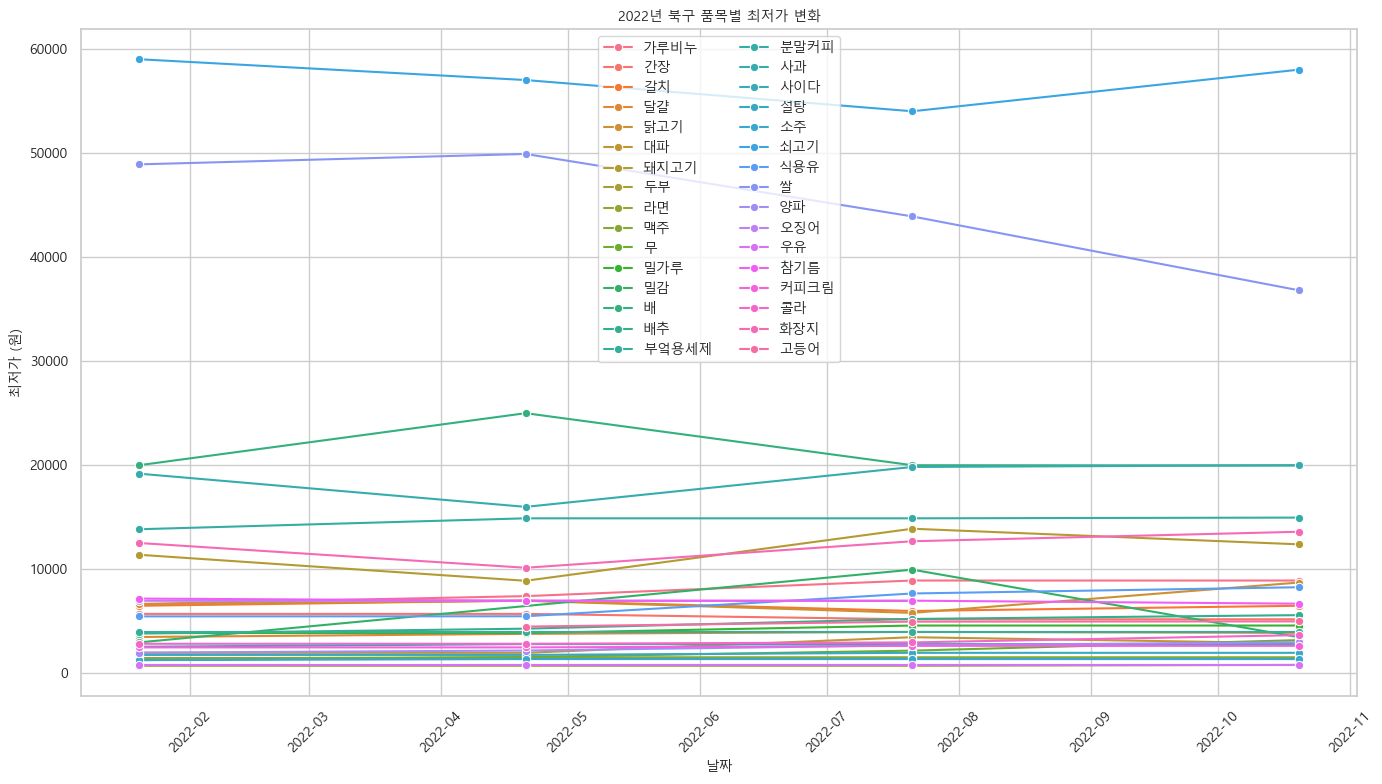

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2022_1q.csv")
q2 = pd.read_csv("북구2022_2q.csv")
q3 = pd.read_csv("북구2022_3q.csv")
q4 = pd.read_csv("북구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 북구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("북구2022_min.csv", index=False, encoding="utf-8-sig")

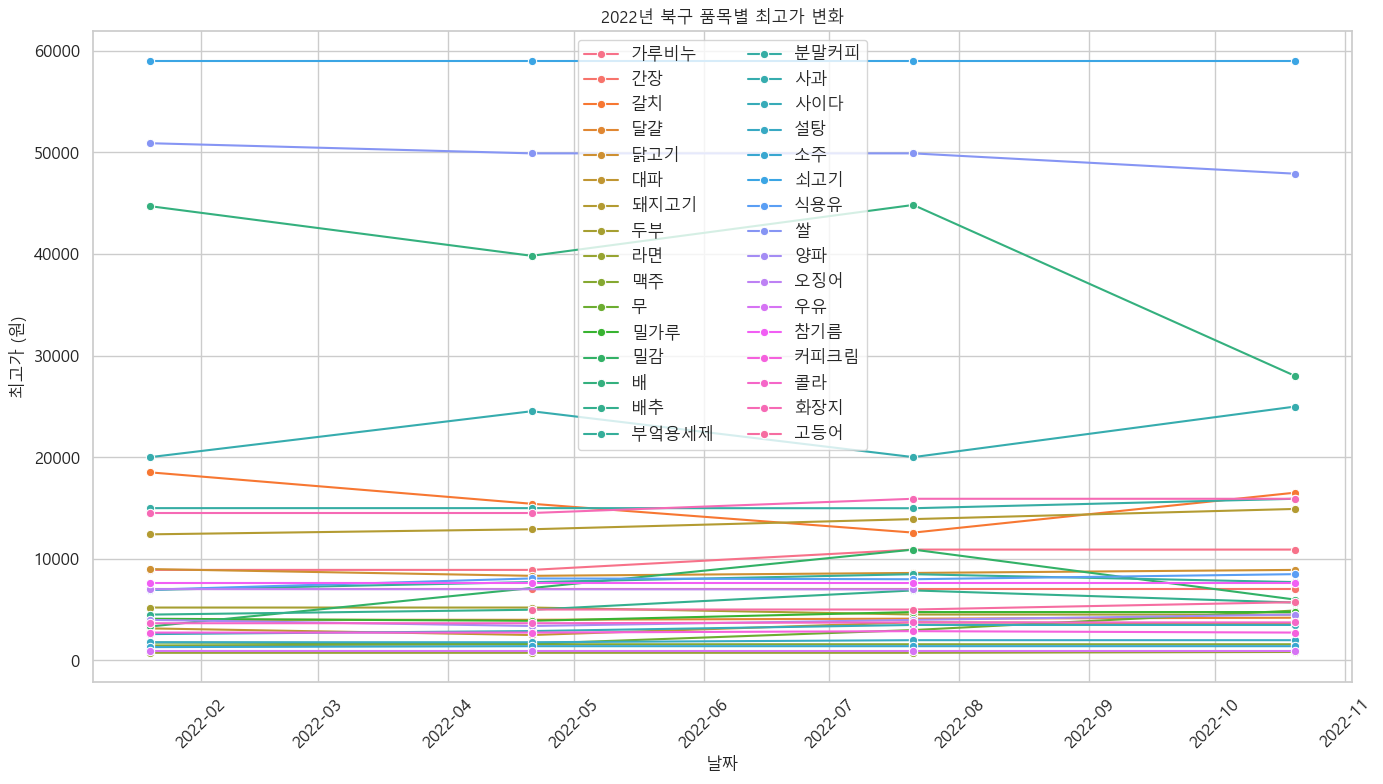

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2022_1q.csv")
q2 = pd.read_csv("북구2022_2q.csv")
q3 = pd.read_csv("북구2022_3q.csv")
q4 = pd.read_csv("북구2022_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2022년 북구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("북구2022_max.csv", index=False, encoding="utf-8-sig")